#  covid-19-Forecast situation in INDIA with ARIMA 

Corona virus disease (COVID-19) is an infectious
respiratory disease caused by a newly discovered
corona virus.
It has caused pandemic over *185 countries* around the
world i.e. 95.38% countries of the world have been
affected more or less.

**How does the corona disease spread?**

The corona virus spreads through the droplets of saliva
or nasal discharge. When the patient sneezes or coughs
the virus transmits and affect the healthy person. The
only closely contact with the patient could be able to
spread the disease.

Let's forcast covid-19 situation in India with ARIMA (Auto Regressive Moving Average) model. With historical data analysis the model could be able to learn the pattern and could be able to 

# forecast/predict the data point for upcoming days/months.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('covid19-global-forecasting-week-4/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [47]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

from datetime import datetime

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000214BC0F7E08>],
      dtype=object)

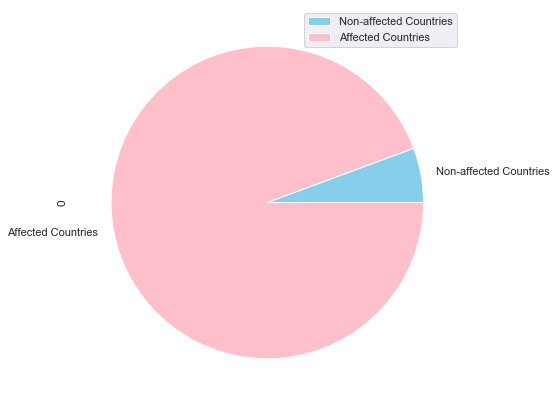

In [48]:
df = pd.DataFrame([11,184], index=['Non-affected Countries', 'Affected Countries'])
df.plot(kind='pie', subplots=True,colors=['skyblue','pink'], figsize=(7, 8))

In [42]:
df

0
Non-affected Countries   11
Affected Countries      184

In [49]:
train=pd.read_csv('covid19-global-forecasting-week-4/train.csv')
train.head()

Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0

In [50]:
df3 = train.groupby('Country_Region')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
countries = df3['Country_Region'].unique()
print(f'{len(countries)} countries are in dataset:\n{countries}')

184 countries are in dataset:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' '

In [52]:
dfc = train.groupby(['Date', 'Country_Region'])[['ConfirmedCases', 'Fatalities']].sum().reset_index()
today = dfc['Date'].max()
print('Date: ', today)
for i in [1, 10, 100, 1000, 10000]:
    n_countries = len(dfc.query('(Date == @today) & ConfirmedCases > @i'))
    print(f'{n_countries} countries have more than {i} ConfirmedCases')

Date:  2020-04-29
184 countries have more than 1 ConfirmedCases
175 countries have more than 10 ConfirmedCases
138 countries have more than 100 ConfirmedCases
86 countries have more than 1000 ConfirmedCases
35 countries have more than 10000 ConfirmedCases


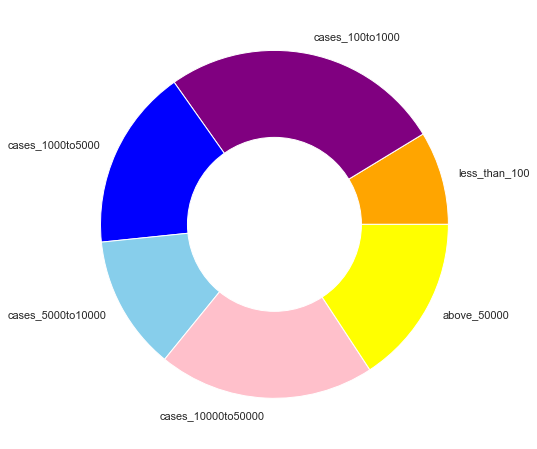

In [53]:
top_countries = train.groupby('Country_Region')[['ConfirmedCases']].sum().reset_index()
less_than_100 = len(top_countries.query('(ConfirmedCases<=100)'))
cases_100to1000 = len(top_countries.query('(ConfirmedCases>=100) & (ConfirmedCases <=1000)'))
cases_1000to5000=len(top_countries.query('(ConfirmedCases>=1000) & (ConfirmedCases <=5000)'))
cases_5000to10000=len(top_countries.query('(ConfirmedCases>=5000) & (ConfirmedCases <=10000)'))
cases_10000to50000=len(top_countries.query('(ConfirmedCases>=10000) & (ConfirmedCases <=50000)'))
above_50000=len(top_countries.query('(ConfirmedCases>=50000)'))
names='less_than_100', 'cases_100to1000', 'cases_1000to5000', 'cases_5000to10000','cases_10000to50000','above_50000'
size=[16,48,31,23,37,29]
my_circle=plt.Circle( (0,0), 0.5, color='white')

plt.pie(size, labels=names, colors=['orange','purple','blue','skyblue','pink','yellow'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [8]:
dfc = train.groupby(['Date', 'Country_Region'])[['ConfirmedCases', 'Fatalities']].sum().reset_index()
all_country_df = dfc.query('Date == @today')
all_country_df['casedensity'] = np.log10(all_country_df['ConfirmedCases'] + 1)
fig = px.choropleth(all_country_df, locations="Country_Region", 
                    locationmode='country names', color="casedensity", 
                    hover_name="Country_Region", hover_data=["ConfirmedCases"],
                    range_color=[all_country_df['casedensity'].min(), all_country_df['casedensity'].max()], 
                    color_continuous_scale="purples", 
                    title=f'Confirmed Case Density {today}')

trace1 = list(fig.select_traces())[0]
trace1.colorbar = go.choropleth.ColorBar(
    tickvals=[0, 1, 2, 3, 4, 5],
    ticktext=['1', '10', '100', '1000','10000'])
fig.show()

If we devide the countries in 0 to 6 range:( Africa: Low to negligeble cases density),(Europe: hight to severly affected cases), (Asia: heigh to moderaate case density),(Ociania: moderate case density),(North America: high to severly affected cases), (South America: moderate case density), (The caribbean: low case density), (Central America:low case density)

In [9]:
top_country_df = dfc.query('(Date == @today) & (ConfirmedCases > 1000)').sort_values('ConfirmedCases', ascending=False)

top_country_melt_df = pd.melt(top_country_df, id_vars='Country_Region', value_vars='ConfirmedCases')

fig = px.bar(top_country_melt_df, x="Country_Region", y="value", color='variable',
              title=f'Confirmed Cases as on {today}')
fig.show()

In [10]:
top10_countries = top_countries.sort_values('ConfirmedCases', ascending=False).iloc[:10]['Country_Region'].unique()
top10_countries_df = dfc[dfc['Country_Region'].isin(top10_countries)]
fig = px.line(top10_countries_df,
              x='Date', y='ConfirmedCases', color='Country_Region',
              title=f'Confirmed Cases for top 10 country as on {today}')
fig.show()

# ARIMA MODEL

In [54]:
data=pd.read_csv('covid19-global-forecasting-week-4/train.csv')
data.head()

Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0

In [55]:
data1= data.groupby(['Date','Country_Region'])[['ConfirmedCases','Fatalities']].sum().reset_index()
data2= data1[data1['Country_Region']=='India']
data2.drop(data2[data2['ConfirmedCases']==0].index,inplace=True)
data2['Newcases']=data2['ConfirmedCases']-data2['ConfirmedCases'].shift(1)
data2['New']= data2['Newcases'].rolling(window=3).mean()
data2.drop(data2[data2['Date']<='2020-03-01'].index,inplace=True)
train1=data2.drop(['Country_Region','ConfirmedCases','Fatalities','Newcases'], axis = 1)
train1.head()

Date       New
7438  2020-03-02  0.666667
7622  2020-03-03  0.666667
7806  2020-03-04  8.333333
7990  2020-03-05  8.333333
8174  2020-03-06  8.666667

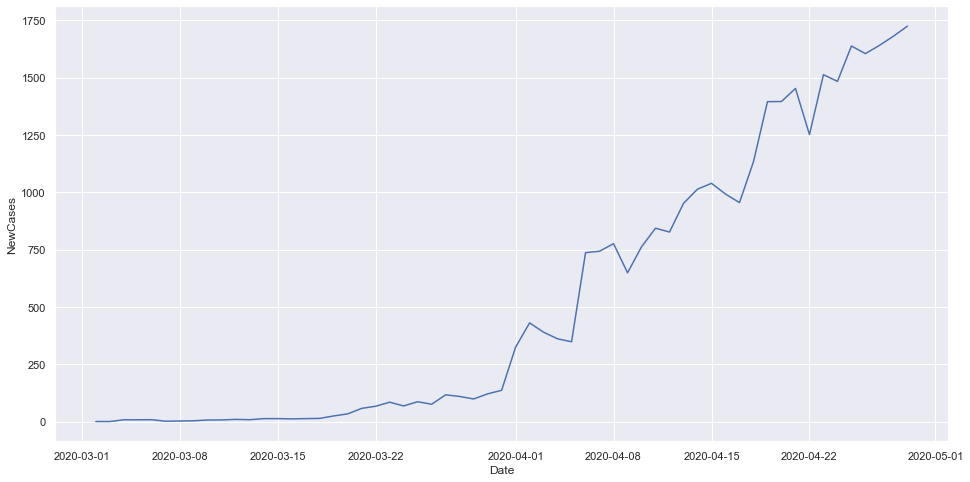

In [56]:
train1['Date']= pd.to_datetime(train1['Date'])
train2=train1.set_index('Date')
plt.xlabel('Date')
plt.ylabel('NewCases')
plt.plot(train2['New'])

In [57]:
train2.dropna(inplace=True)
rolmean = train2['New'].rolling(window=5).mean()
rolstd = train2['New'].rolling(window =5).std()

In [58]:
from statsmodels.tsa.stattools import adfuller
print('Dicky fuller taste')
dftest = adfuller(train2['New'],autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['Test statistics','P-value','#Lags used','Number of observations'])
for key,values in dftest[4].items():
    dfout['Critical values(%s)'%key]=values
print(dfout)

Dicky fuller taste
Test statistics            0.840600
P-value                    0.992264
#Lags used                10.000000
Number of observations    48.000000
Critical values(1%)       -3.574589
Critical values(5%)       -2.923954
Critical values(10%)      -2.600039
dtype: float64


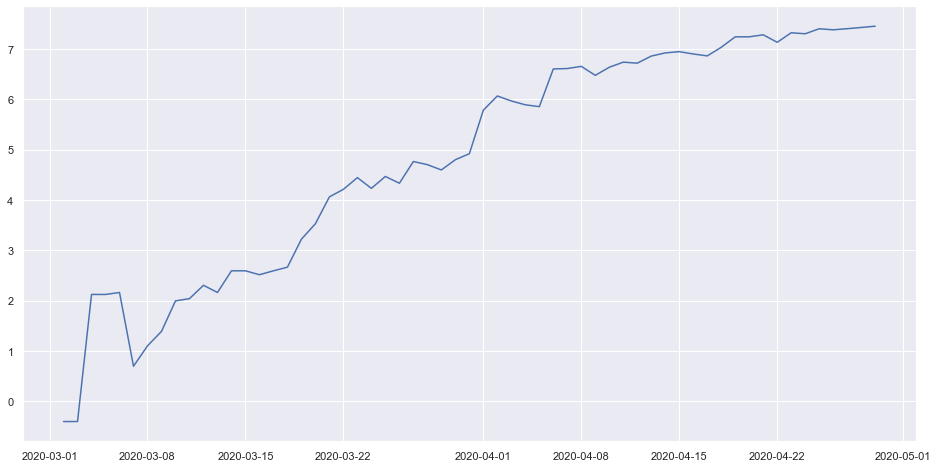

In [59]:
train2_logscale = np.log(train2['New'])
train2_logscale.dropna(inplace=True)
plt.plot(train2_logscale)

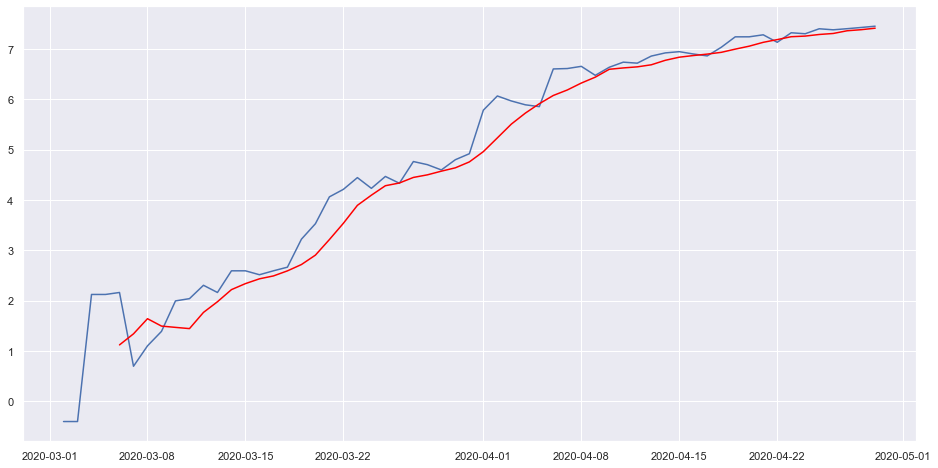

In [60]:
movingAverage = train2_logscale.rolling(window=5).mean()
movingSTD = train2_logscale.rolling(window =5).std()
plt.plot(train2_logscale)
plt.plot(movingAverage,color='red')

In [61]:
tm_log_avg = train2_logscale-movingAverage
tm_log_avg.dropna(inplace=True)
def test_stationary(timeseries):
    movingAverage =timeseries.rolling(window=5).mean()
    movingSTD = timeseries.rolling(window=5).std()
    orig = plt.plot(timeseries,color='blue',label='Orginal')
    avg = plt.plot(movingAverage,color='black',label='Moving Average')
    std = plt.plot(movingSTD,color='red',label='Rollong std')
    plt.legend(loc='best')
    plt.title('Rolling mean and rolling std')
    plt.show()
    
    print('Dicky fuller taste')
    dftest = adfuller(train2['New'],autolag='AIC')
    dfout = pd.Series(dftest[0:4],index=['Test statistics','P-value','#Lags used','Number of observations'])
    for key,values in dftest[4].items():
        dfout['Critical values(%s)'%key]=values
        print(dfout)

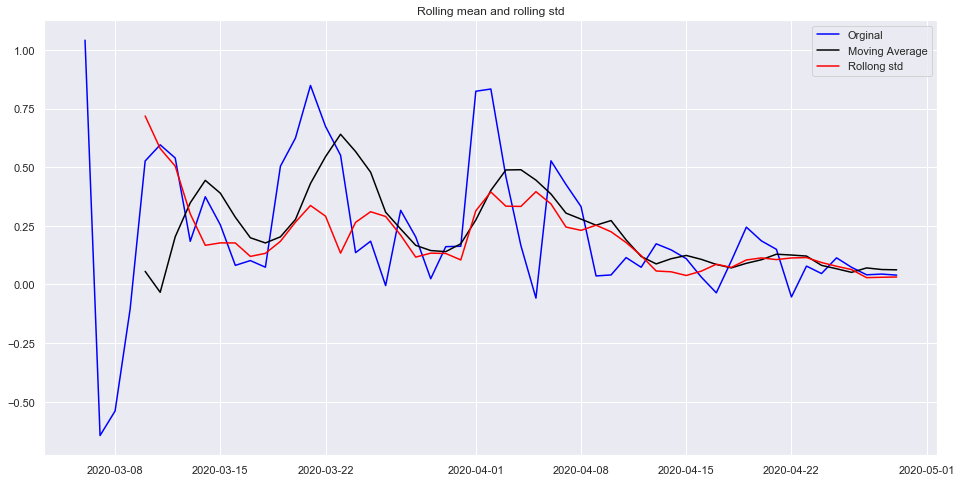

Dicky fuller taste
Test statistics            0.840600
P-value                    0.992264
#Lags used                10.000000
Number of observations    48.000000
Critical values(1%)       -3.574589
dtype: float64
Test statistics            0.840600
P-value                    0.992264
#Lags used                10.000000
Number of observations    48.000000
Critical values(1%)       -3.574589
Critical values(5%)       -2.923954
dtype: float64
Test statistics            0.840600
P-value                    0.992264
#Lags used                10.000000
Number of observations    48.000000
Critical values(1%)       -3.574589
Critical values(5%)       -2.923954
Critical values(10%)      -2.600039
dtype: float64


In [62]:
test_stationary(tm_log_avg)

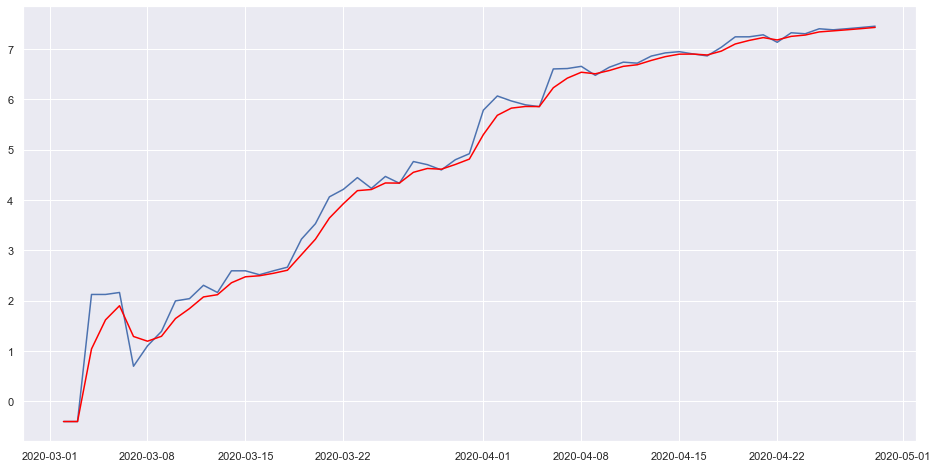

In [63]:
exponential= train2_logscale.ewm(halflife=1,min_periods=0,adjust=True).mean()
plt.plot(train2_logscale)
plt.plot(exponential, color='red')

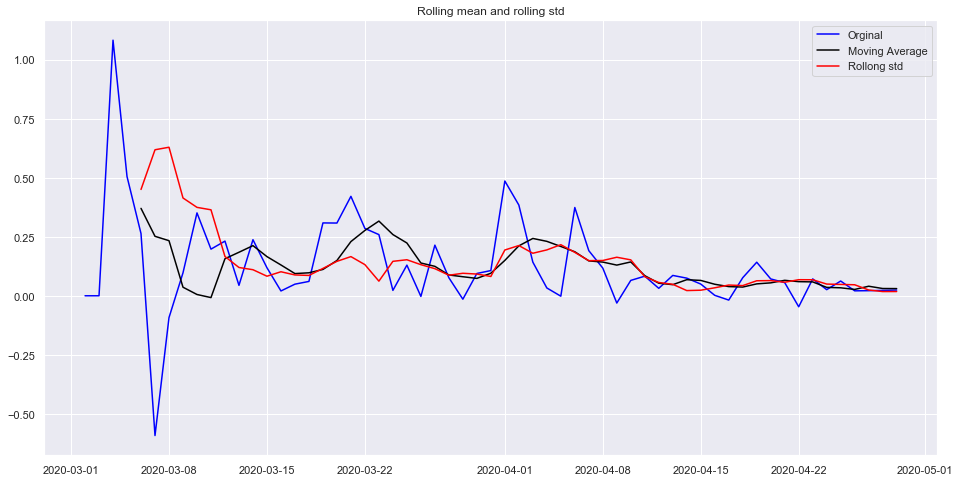

Dicky fuller taste
Test statistics            0.840600
P-value                    0.992264
#Lags used                10.000000
Number of observations    48.000000
Critical values(1%)       -3.574589
dtype: float64
Test statistics            0.840600
P-value                    0.992264
#Lags used                10.000000
Number of observations    48.000000
Critical values(1%)       -3.574589
Critical values(5%)       -2.923954
dtype: float64
Test statistics            0.840600
P-value                    0.992264
#Lags used                10.000000
Number of observations    48.000000
Critical values(1%)       -3.574589
Critical values(5%)       -2.923954
Critical values(10%)      -2.600039
dtype: float64


In [64]:
mexponential = train2_logscale-exponential
test_stationary(mexponential)

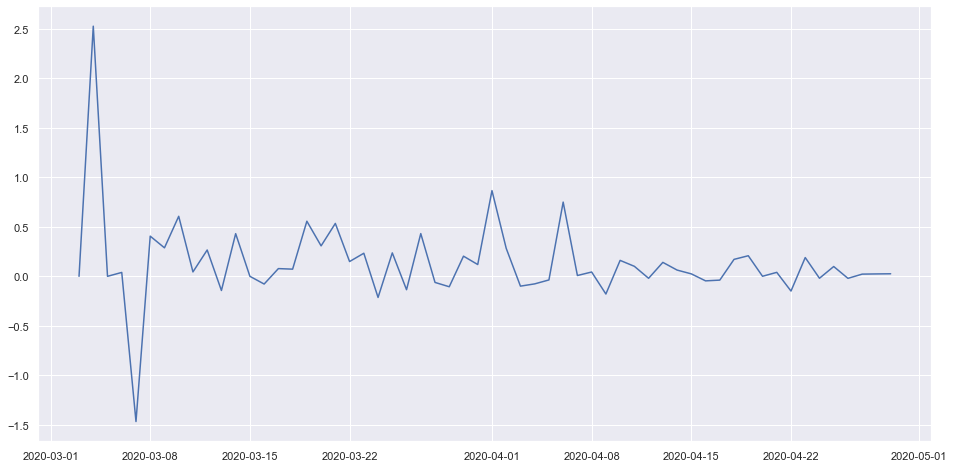

In [65]:
datashifting = train2_logscale-train2_logscale.shift(1)
plt.plot(datashifting)

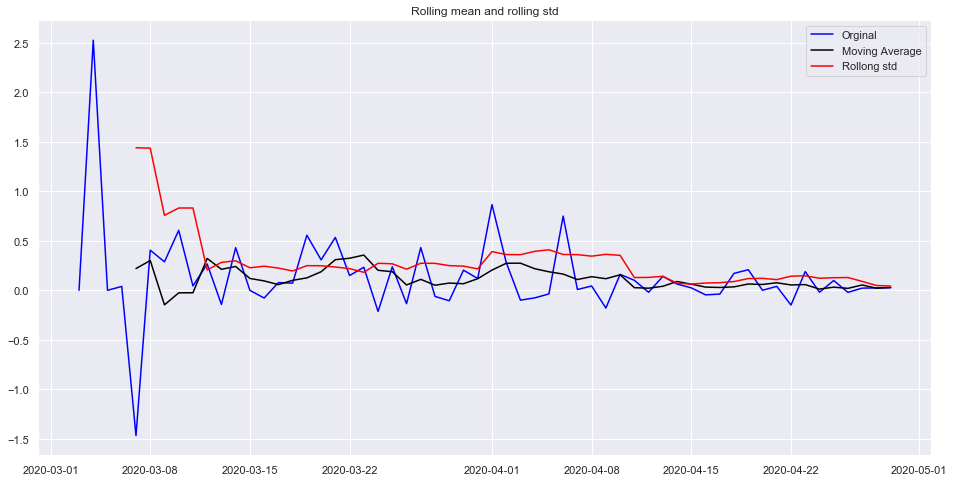

Dicky fuller taste
Test statistics            0.840600
P-value                    0.992264
#Lags used                10.000000
Number of observations    48.000000
Critical values(1%)       -3.574589
dtype: float64
Test statistics            0.840600
P-value                    0.992264
#Lags used                10.000000
Number of observations    48.000000
Critical values(1%)       -3.574589
Critical values(5%)       -2.923954
dtype: float64
Test statistics            0.840600
P-value                    0.992264
#Lags used                10.000000
Number of observations    48.000000
Critical values(1%)       -3.574589
Critical values(5%)       -2.923954
Critical values(10%)      -2.600039
dtype: float64


In [66]:
datashifting.dropna(inplace=True)
test_stationary(datashifting)

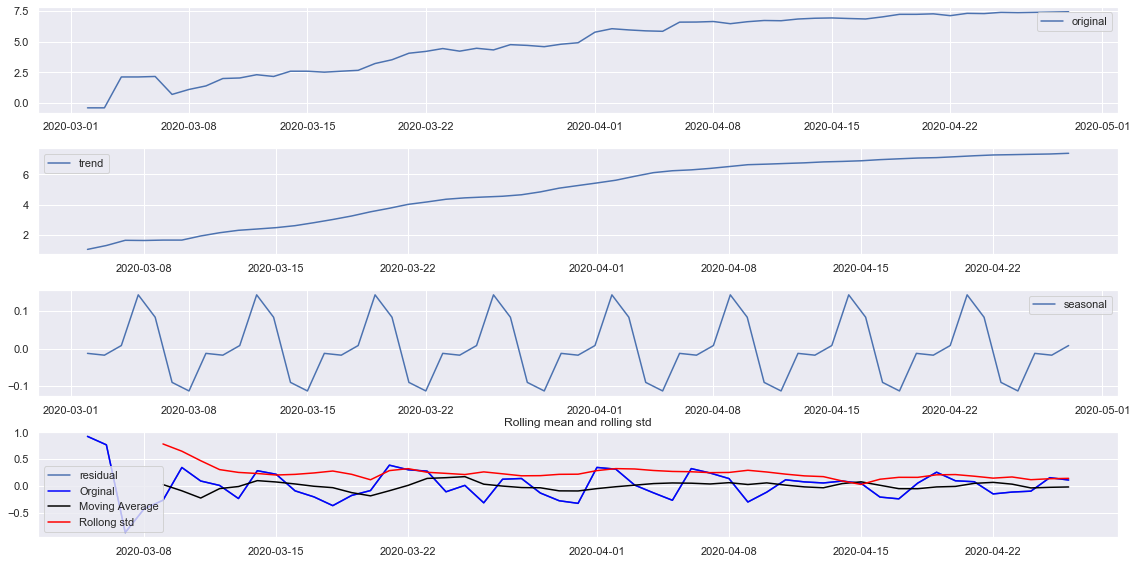

Dicky fuller taste
Test statistics            0.840600
P-value                    0.992264
#Lags used                10.000000
Number of observations    48.000000
Critical values(1%)       -3.574589
dtype: float64
Test statistics            0.840600
P-value                    0.992264
#Lags used                10.000000
Number of observations    48.000000
Critical values(1%)       -3.574589
Critical values(5%)       -2.923954
dtype: float64
Test statistics            0.840600
P-value                    0.992264
#Lags used                10.000000
Number of observations    48.000000
Critical values(1%)       -3.574589
Critical values(5%)       -2.923954
Critical values(10%)      -2.600039
dtype: float64


In [67]:
train2_logscale.dropna(inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

decompose = seasonal_decompose(train2_logscale)

trend = decompose.trend
seasonal=decompose.seasonal
residual=decompose.resid

plt.subplot(411)
plt.plot(train2_logscale,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')
plt.tight_layout()

decomposelog= residual
decomposelog.dropna(inplace=True)
test_stationary(decomposelog)

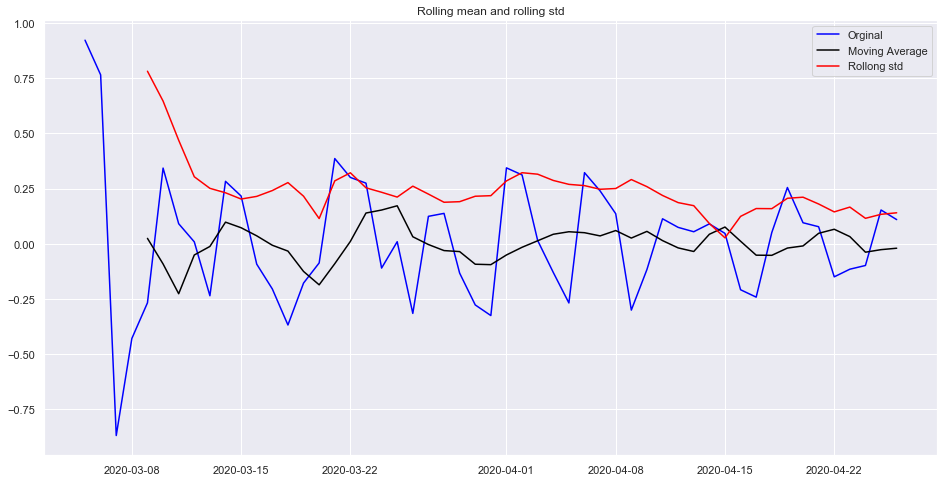

Dicky fuller taste
Test statistics            0.840600
P-value                    0.992264
#Lags used                10.000000
Number of observations    48.000000
Critical values(1%)       -3.574589
dtype: float64
Test statistics            0.840600
P-value                    0.992264
#Lags used                10.000000
Number of observations    48.000000
Critical values(1%)       -3.574589
Critical values(5%)       -2.923954
dtype: float64
Test statistics            0.840600
P-value                    0.992264
#Lags used                10.000000
Number of observations    48.000000
Critical values(1%)       -3.574589
Critical values(5%)       -2.923954
Critical values(10%)      -2.600039
dtype: float64


In [68]:
decomposedlogdata = residual
decomposedlogdata.dropna(inplace=True)
test_stationary(decomposedlogdata)

Plotting AR model


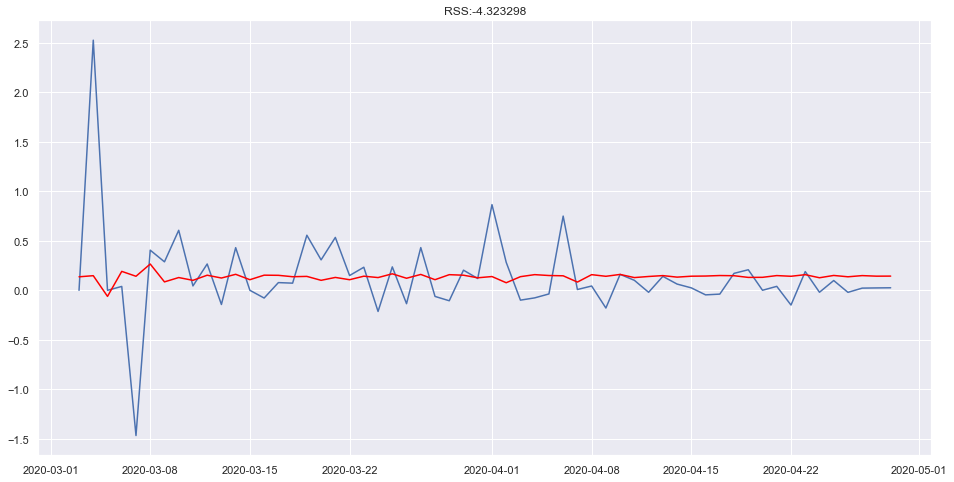

In [69]:
from statsmodels.tsa.arima_model import ARIMA
model =ARIMA(train2_logscale,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(datashifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%4F'%sum(results_AR.fittedvalues - datashifting**2))
print('Plotting AR model')

Plotting MR model


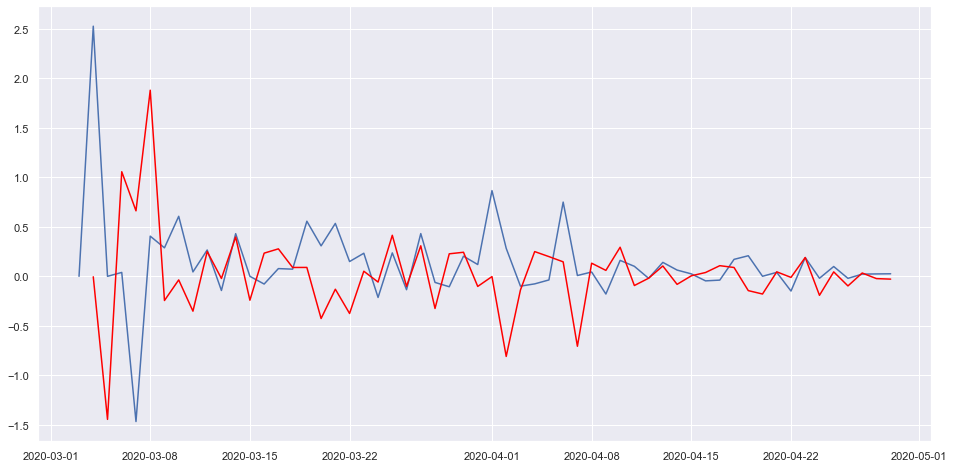

In [70]:
model =ARIMA(train2_logscale,order=(2,2,1))
results_MA =model.fit(disp=-1)
plt.plot(datashifting)
plt.plot(results_MA.fittedvalues,color='red')
print('Plotting MR model') 

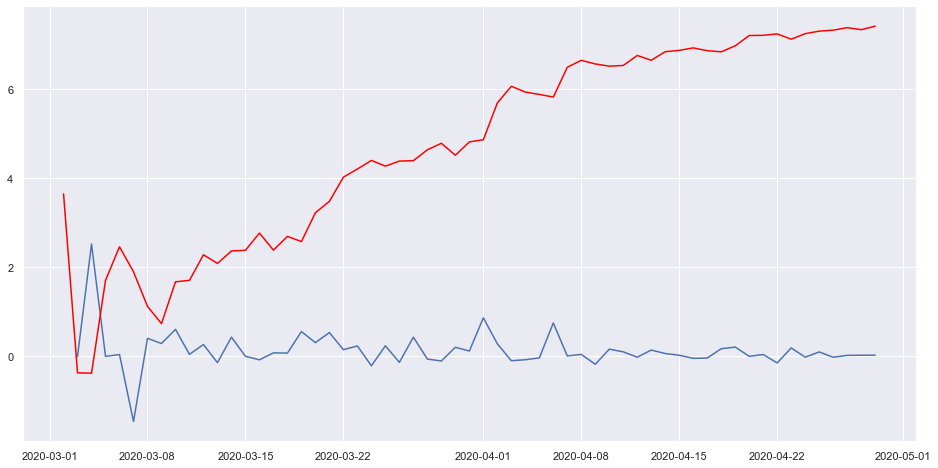

In [71]:
model = ARIMA(train2_logscale,order=(2,0,1))
results_ARIMA= model.fit(disp=-1)
plt.plot(datashifting)
plt.plot(results_ARIMA.fittedvalues,color='red')

In [72]:
predictions_ARIMA_diff= pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Date
2020-03-02    3.653197
2020-03-03   -0.372031
2020-03-04   -0.378694
2020-03-05    1.707890
2020-03-06    2.462754
dtype: float64


In [73]:
prediction_ARIMA_log=pd.Series(train2_logscale.ix[0],index= train2_logscale.index)
prediction_ARIMA_log=prediction_ARIMA_log.add(predictions_ARIMA_diff,fill_value=0)
prediction_ARIMA_log.head()

Date
2020-03-02    3.247732
2020-03-03   -0.777496
2020-03-04   -0.784159
2020-03-05    1.302425
2020-03-06    2.057289
dtype: float64

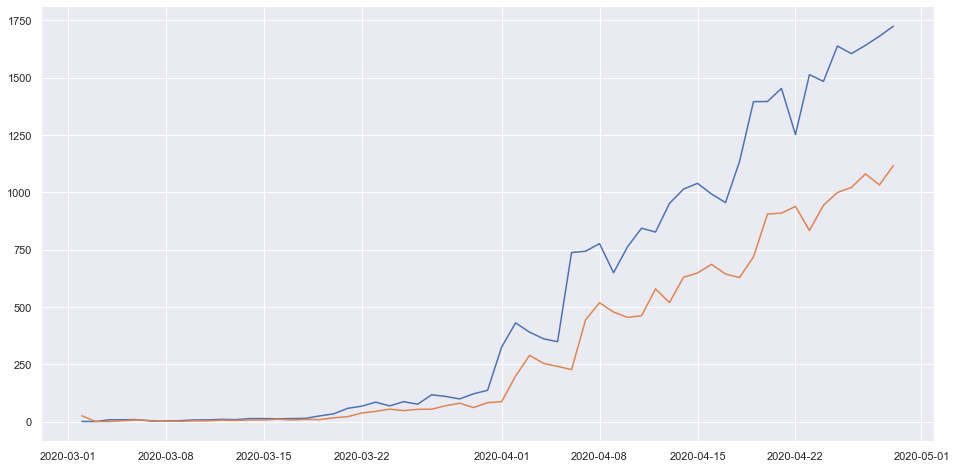

In [74]:
sns.set(rc={'figure.figsize':(16, 8)})
predictions_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(train2)
plt.plot(predictions_ARIMA)

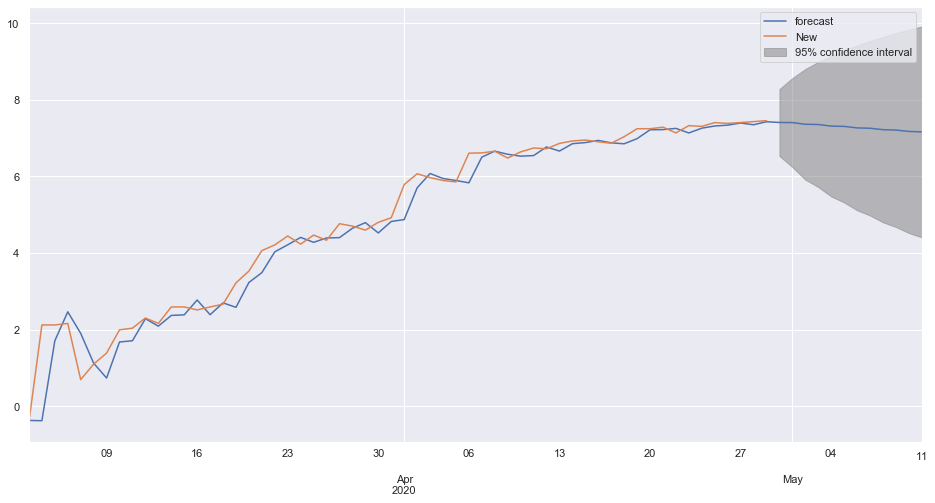

In [75]:
results_ARIMA.plot_predict(1,70)
x=results_ARIMA.forecast(steps=70)

The pick value is showing around 27th April to 4th may.And no new cases would be found near mid of June. And the maximum daily cases will reach 924+ which could be visualized from predicted data range given below. The gray shaded part is the min-max range of the predictable region. The ARIMA model could be able to find the decling portion properly once the growth rate start declining. 

In [34]:
values0=x[0][::-1]
values0=np.exp(values0)
values1=x[1]
values1=np.exp(values1)
values= np.concatenate((values1,values0)) 
values

array([1.56252832e+00, 1.80948455e+00, 2.08938760e+00, 2.30008875e+00,
       2.55204914e+00, 2.75451041e+00, 2.99576739e+00, 3.19677266e+00,
       3.43312715e+00, 3.63525087e+00, 3.86932104e+00, 4.07368669e+00,
       4.30682481e+00, 4.51391687e+00, 4.74686670e+00, 4.95684593e+00,
       5.19002133e+00, 5.40286963e+00, 5.63649012e+00, 5.85208525e+00,
       6.08624873e+00, 6.30440612e+00, 6.53913096e+00, 6.75962878e+00,
       6.99487960e+00, 7.21747439e+00, 7.45317877e+00, 7.67761567e+00,
       7.91367530e+00, 8.13969488e+00, 8.37599340e+00, 8.60333632e+00,
       8.83974493e+00, 9.06815517e+00, 9.30453676e+00, 9.53376392e+00,
       9.76997617e+00, 9.99977702e+00, 1.02356749e+01, 1.04658144e+01,
       1.07012518e+01, 1.09315041e+01, 1.11663357e+01, 1.13964842e+01,
       1.16305664e+01, 1.18604043e+01, 1.20935961e+01, 1.23229266e+01,
       1.25550905e+01, 1.27837266e+01, 1.30147294e+01, 1.32424939e+01,
       1.34722066e+01, 1.36989323e+01, 1.39272310e+01, 1.41527601e+01,
      

In [37]:
ts = pd.read_csv('covid19-global-forecasting-week-4/train.csv')
ts= ts[ts['Country_Region']=='India']
ts.drop(ts[ts['ConfirmedCases']==0].index,inplace=True)
ts['New']=ts['ConfirmedCases']-ts['ConfirmedCases'].shift(1)
ts.drop(ts[ts['Date']<= '2020-03-05'].index,inplace=True)
ts1= ts.groupby('Date')[['New']].sum().reset_index()
ts2 = np.array(ts1['New'])

Text(0, 0.5, 'Range')

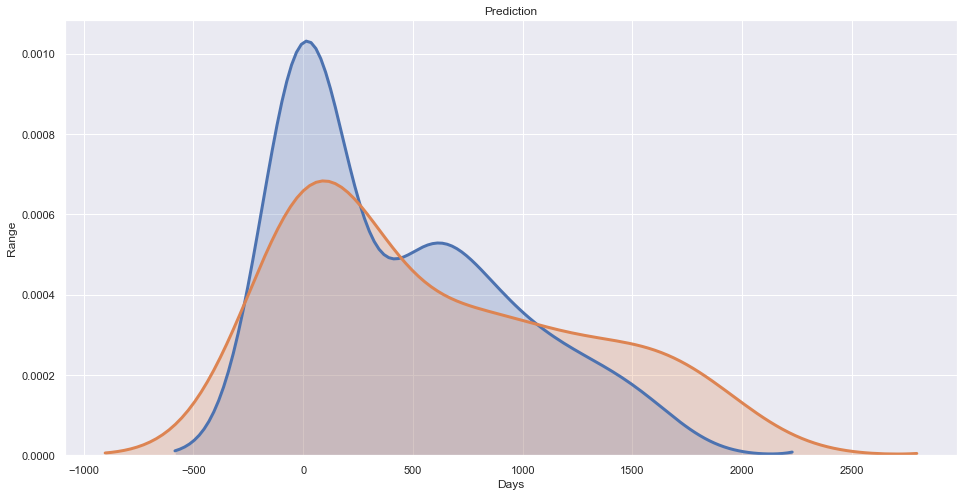

In [38]:
sns.distplot(values,hist=False,kde= True,kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(ts2, hist= False,kde=True,kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Prediction')
plt.xlabel('Days')
plt.ylabel('Range')

The KDE plot comprises the original daily new cases vs the predicted daily new cases according to the growth rate. As per the 21st lock down the number of new cases has been decreased a lot.
As per the research the COVID has affected **0.17% of the total population in US**, **0.15% of the total population of Germany**, **0.14% of the total population of France** and** 0.24% of the total popualtion of Itally**.
If we consider the total population of India, **27lkhs+** people would have been affected by COVID.